# 1. Dataset

## 1.1 Detailed Explanation of Dataset

Dataset Overview

The dataset captures operational and environmental parameters from a gas turbine located in Turkey's northwestern region. The primary purpose of this dataset is to study and predict Nitrogen Oxides (NOx) emissions, a harmful byproduct of the combustion process in gas turbines. NOx emissions are a major environmental concern due to their contribution to air pollution and smog formation, making the prediction of these emissions critical for compliance with environmental regulations.

Source

The dataset is taken from the UCI repository.The dataset is sourced from a gas turbine located in Turkey's northwestern region and includes 7158 instances. Each instance capturing various turbine parameters and ambient conditions. The data includes sensor measurements and operational variables, which can be used to predict NOx emissions.

Features:

1. Ambient Temperature (AT) [°C]: Temperature of the surrounding environment.
2. Ambient Pressure (AP) [mbar]: Atmospheric pressure around the turbine. 
3. Ambient Humidity (AH) [%]: Moisture content in the air.
4. Air Filter Difference Pressure (AFDP) [mbar]: Pressure difference across the turbine's air filters, indicating efficiency in air intake.
5. Gas Turbine Exhaust Pressure (GTEP) [mbar]: Exhaust pressure, affecting the flow of gases and the efficiency of combustion.
6. Turbine Inlet Temperature (TIT) [°C]: Temperature of the air-fuel mixture entering the turbine.
7. Turbine Energy Yield (TEY) [MWh]: Energy output of the turbine, related to fuel consumption and combustion efficiency.
8. Turbine After Temperature (TAT) [°C]: Temperature of the exhaust gases after passing through the turbine.
9. Compressor Discharge Pressure (CDP) [mbar]: The pressure after air is compressed in the turbine.
10. Carbon Monoxide (CO) [mg/m³]: Indicates the level of incomplete combustion. The concentration of CO in the exhaust gases.
    
Target:

1. Nitrogen Oxides (NOx) [mg/m³]: The target variable, representing the concentration of NOx emissions, which are a key concern for environmental regulations.

Challenges / Limitations:

1. Nonlinear Relationships: The relationships between the features and NOx emissions are complex and nonlinear, making modeling challenging.
2. Feature Correlation: Some features, such as turbine inlet and after temperatures, may be highly correlated, leading to multicollinearity, which can distort model predictions.
3. Sensor Data Quality: The dataset may contain noise or inaccuracies due to sensor degradation or external factors, affecting the reliability of predictions.
4. Environmental Sensitivity: NOx emissions are highly sensitive to changes in ambient conditions (temperature, pressure, humidity), introducing variability in the data.
5. Outliers in Sensor Data: Outliers in sensor readings due to miscalibration or extreme conditions.
6. Changing Operating Conditions: Turbine efficiency changes over time due to wear, tear, or maintenance.
7. Imbalanced Data Distribution: NOx emissions may be imbalanced, with more instances of low emissions and fewer of high emissions.

## 1.2 Detailed Description of Regression Task

Task Overview:

The goal of this predictive regression task is to predict the Nitrogen Oxides (NOx) emissions from a gas turbine based on various environmental and operational sensor data. NOx emissions are a critical environmental concern as they contribute to air pollution and must be monitored and regulated in many industries, including power generation.

Target Variable:

NOx Emissions [mg/m³]: The concentration of Nitrogen Oxides (NOx) in the exhaust gases of the gas turbine. NOx emissions result from high-temperature combustion, and their reduction is vital for meeting environmental standards.

Rationale:
1. Why NOx?:  NOx emissions are strictly regulated by environmental agencies due to their harmful effects on human health and the environment. Predicting NOx emissions in advance allows operators to make adjustments to turbine operations and reduce emissions before they reach harmful levels.
2. Relevance: Power plants are under increasing pressure to reduce NOx emissions as part of global efforts to combat air pollution. Developing a model that can accurately predict NOx emissions enables proactive management and optimization of combustion processes, ultimately contributing to better compliance with emission standards.
3. Interest: This problem is not only relevant from an environmental standpoint but also technologically interesting, as it involves complex interactions between variables like temperature, pressure, humidity, and combustion efficiency.

Relevant Features:

1. Ambient Temperature (AT) [°C]: Affects combustion temperature and NOx formation.

2. Ambient Pressure (AP) [mbar]: Impacts air density and combustion efficiency.

3. Ambient Humidity (AH) [%]: Influences combustion temperatures and NOx emissions.

4. Air Filter Difference Pressure (AFDP) [mbar]: Reflects air intake efficiency.

5. Gas Turbine Exhaust Pressure (GTEP) [mbar]: Influences exhaust gas flow and combustion efficiency.

6. Turbine Inlet Temperature (TIT) [°C]: Affects combustion temperature, directly related to NOx emissions.

7. Turbine After Temperature (TAT) [°C]: Indicates combustion efficiency and exhaust gas conditions.

8. Turbine Energy Yield (TEY) [MWh]: Represents the energy output of the turbine, indirectly affecting emissions.

9. Compressor Discharge Pressure (CDP) [mbar]: Affects air compression efficiency and combustion. 

10. Carbon Monoxide (CO) [mg/m³]: An indicator of combustion efficiency and quality, influencing NOx emissions.

Challenges:

1. Multicollinearity: Features like temperatures and pressures could be highly correlated with each other. Multicollinearity can distort the regression coefficients, making it difficult to interpret which variables are truly impacting the target variable.
2. Feature Selection: With many features, some may not contribute significantly to the prediction of NOx emissions. Deciding which features to include or exclude is challenging and could affect model accuracy and interpretability.
3. Overfitting: In regression tasks, overfitting can occur when the model is too complex or includes too many features. This leads to the model fitting the noise in the training data rather than the underlying pattern, causing poor performance on unseen data.
4. Outliers and Noise: Sensor data can often have outliers or noise that may skew the regression model. These abnormal values can disproportionately affect predictions and reduce model robustness.
5. Feature Scaling: Features such as ambient temperature (AT) and compressor discharge pressure (CDP) might have vastly different scales. Without appropriate scaling, the regression model could give more weight to variables with larger numerical ranges, leading to biased predictions.
6. Heteroscedasticity: In regression tasks, heteroscedasticity (i.e., non-constant variance of residuals) can be a problem. If the variance of the errors increases with the size of the predicted value, it can violate regression assumptions and affect the model’s ability to generalize.
7. Model Generalization: Ensuring that the regression model generalizes well to new, unseen data is always a challenge. If the model fits the training data too closely, it may fail to make accurate predictions in different environmental or operational conditions.

# Importing Libraries

In [197]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest, RandomForestRegressor
from sklearn.neighbors import KernelDensity
from sklearn.cluster import estimate_bandwidth
from scipy.stats.mstats import mquantiles
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold  ### import
from sklearn.metrics import r2_score

# 2. Preprocessing

In [198]:
power_plant=pd.read_csv('gas_2014.xls')

In [199]:
power_plant.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,8.8358,1022.2,98.762,3.2422,23.152,1067.5,549.94,126.16,11.381,1.9157,68.292
1,9.0529,1021.8,97.464,3.2074,23.207,1067.9,549.80,126.51,11.476,2.0596,68.610
2,9.2464,1021.3,96.494,3.2051,23.296,1068.5,549.89,126.96,11.555,2.1621,68.324
3,9.3792,1020.9,95.912,3.2159,23.465,1069.6,549.94,127.83,11.539,2.1214,67.619
4,9.5757,1020.8,95.412,3.1898,23.205,1068.1,549.83,126.56,11.484,2.1549,66.499


In [200]:
len(power_plant)

7158

## Renaming the columns

In [201]:
power_plant = power_plant.rename(columns={
    "AT": "Ambient Temperature",
    "AP": "Ambient Pressure",
    "AH": "Ambient Humidity",
    "AFDP": "Air Filter Diff Pres",
    "GTEP": "Gas Turbine Exhaust Pres",
    "TIT": "Turbine Inlet Temp",
    "TAT": "Turbine After Temp",
    "TEY": "Turbine Energy Yield",
    "CDP": "Compressor Discharge Pres",
    "CO": "Carbon Monoxide",
    "NOX": "Nitrogen Oxides"
    
})

In [202]:
power_plant.head()

,Ambient Temperature,Ambient Pressure,Ambient Humidity,Air Filter Diff Pres,Gas Turbine Exhaust Pres,Turbine Inlet Temp,Turbine After Temp,Turbine Energy Yield,Compressor Discharge Pres,Carbon Monoxide,Nitrogen Oxides
0,8.8358,1022.2,98.762,3.2422,23.152,1067.5,549.94,126.16,11.381,1.9157,68.292
1,9.0529,1021.8,97.464,3.2074,23.207,1067.9,549.80,126.51,11.476,2.0596,68.610
2,9.2464,1021.3,96.494,3.2051,23.296,1068.5,549.89,126.96,11.555,2.1621,68.324
3,9.3792,1020.9,95.912,3.2159,23.465,1069.6,549.94,127.83,11.539,2.1214,67.619
4,9.5757,1020.8,95.412,3.1898,23.205,1068.1,549.83,126.56,11.484,2.1549,66.499


In [203]:
power_plant.columns

Index(['Ambient Temperature', 'Ambient Pressure', 'Ambient Humidity',
       'Air Filter Diff Pres', 'Gas Turbine Exhaust Pres',
       'Turbine Inlet Temp', 'Turbine After Temp', 'Turbine Energy Yield',
       'Compressor Discharge Pres', 'Carbon Monoxide', 'Nitrogen Oxides'],
      dtype='object')

In [204]:
power_plant.head()

,Ambient Temperature,Ambient Pressure,Ambient Humidity,Air Filter Diff Pres,Gas Turbine Exhaust Pres,Turbine Inlet Temp,Turbine After Temp,Turbine Energy Yield,Compressor Discharge Pres,Carbon Monoxide,Nitrogen Oxides
0,8.8358,1022.2,98.762,3.2422,23.152,1067.5,549.94,126.16,11.381,1.9157,68.292
1,9.0529,1021.8,97.464,3.2074,23.207,1067.9,549.80,126.51,11.476,2.0596,68.610
2,9.2464,1021.3,96.494,3.2051,23.296,1068.5,549.89,126.96,11.555,2.1621,68.324
3,9.3792,1020.9,95.912,3.2159,23.465,1069.6,549.94,127.83,11.539,2.1214,67.619
4,9.5757,1020.8,95.412,3.1898,23.205,1068.1,549.83,126.56,11.484,2.1549,66.499


In [205]:
power_plant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7158 entries, 0 to 7157
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Ambient Temperature        7158 non-null   float64
 1   Ambient Pressure           7158 non-null   float64
 2   Ambient Humidity           7158 non-null   float64
 3   Air Filter Diff Pres       7158 non-null   float64
 4   Gas Turbine Exhaust Pres   7158 non-null   float64
 5   Turbine Inlet Temp         7158 non-null   float64
 6   Turbine After Temp         7158 non-null   float64
 7   Turbine Energy Yield       7158 non-null   float64
 8   Compressor Discharge Pres  7158 non-null   float64
 9   Carbon Monoxide            7158 non-null   float64
 10  Nitrogen Oxides            7158 non-null   float64
dtypes: float64(11)
memory usage: 615.3 KB


In [206]:
power_plant.describe(include='all')

,Ambient Temperature,Ambient Pressure,Ambient Humidity,Air Filter Diff Pres,Gas Turbine Exhaust Pres,Turbine Inlet Temp,Turbine After Temp,Turbine Energy Yield,Compressor Discharge Pres,Carbon Monoxide,Nitrogen Oxides
count,7158.000000,7158.000000,7158.000000,7158.000000,7158.000000,7158.000000,7158.000000,7158.000000,7158.000000,7158.000000,7158.000000
mean,18.217071,1012.384261,82.143926,3.914499,25.741993,1078.836854,547.638254,132.907978,12.023857,2.081103,60.066886
std,6.994920,5.973395,13.000424,0.710941,3.684873,16.574391,4.611472,13.602856,0.948352,2.006939,9.971729
min,1.144400,994.840000,25.987000,2.151700,17.939000,1002.900000,511.040000,100.030000,9.851800,0.001640,27.183000
25%,12.925500,1008.100000,73.441250,3.552750,23.698250,1069.625000,546.972500,123.380000,11.447000,1.251125,53.876750
50%,18.284000,1012.000000,84.656500,3.859650,25.194000,1079.200000,549.910000,133.420000,11.909000,1.655300,59.278500
75%,23.684000,1016.300000,92.826000,4.314350,27.994000,1092.500000,550.050000,141.635000,12.641250,2.160225,64.031000
max,34.189000,1031.400000,100.100000,6.738600,36.216000,1100.900000,550.600000,168.630000,14.617000,34.820000,118.470000


## Checking for Unique values in each Feature and Target

In [207]:
power_plant.nunique()

Ambient Temperature          6338
Ambient Pressure              379
Ambient Humidity             6498
Air Filter Diff Pres         6063
Gas Turbine Exhaust Pres     4828
Turbine Inlet Temp            700
Turbine After Temp           1320
Turbine Energy Yield         3195
Compressor Discharge Pres    2721
Carbon Monoxide              6240
Nitrogen Oxides              6285
dtype: int64

## Checking for Null Values

In [208]:
power_plant.isnull().sum()

Ambient Temperature          0
Ambient Pressure             0
Ambient Humidity             0
Air Filter Diff Pres         0
Gas Turbine Exhaust Pres     0
Turbine Inlet Temp           0
Turbine After Temp           0
Turbine Energy Yield         0
Compressor Discharge Pres    0
Carbon Monoxide              0
Nitrogen Oxides              0
dtype: int64

In [209]:
X= power_plant.iloc[:,:10]
y=power_plant.iloc[:,10]

In [210]:
X.head()

,Ambient Temperature,Ambient Pressure,Ambient Humidity,Air Filter Diff Pres,Gas Turbine Exhaust Pres,Turbine Inlet Temp,Turbine After Temp,Turbine Energy Yield,Compressor Discharge Pres,Carbon Monoxide
0,8.8358,1022.2,98.762,3.2422,23.152,1067.5,549.94,126.16,11.381,1.9157
1,9.0529,1021.8,97.464,3.2074,23.207,1067.9,549.80,126.51,11.476,2.0596
2,9.2464,1021.3,96.494,3.2051,23.296,1068.5,549.89,126.96,11.555,2.1621
3,9.3792,1020.9,95.912,3.2159,23.465,1069.6,549.94,127.83,11.539,2.1214
4,9.5757,1020.8,95.412,3.1898,23.205,1068.1,549.83,126.56,11.484,2.1549


In [211]:
y.head()

0    68.292
1    68.610
2    68.324
3    67.619
4    66.499
Name: Nitrogen Oxides, dtype: float64

## Splitting the dataset into Training and Testing

In [212]:
# Then, split the remaining data into train (80%) and test (20%)

X_remaining, X1, y_remaining, y1 = train_test_split(X,y, test_size=0.16)

X_train, X_test, y_train, y_test = train_test_split(X_remaining, y_remaining, test_size=0.2)

## Outlier Detection

<Axes: >

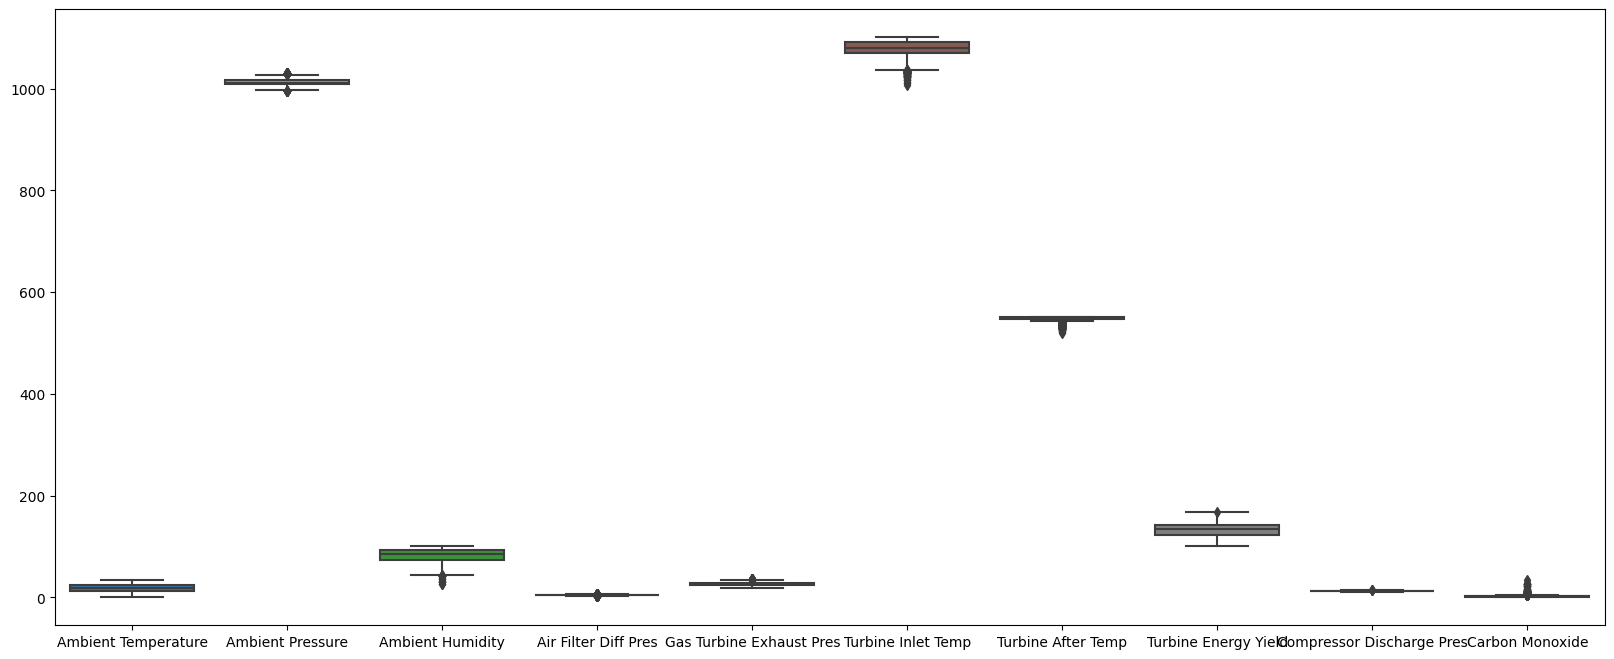

In [213]:
plt.figure(figsize=(20, 8))
sns.boxplot(X_train)

In [214]:
Q1 = X_train['Ambient Temperature'].quantile(0.25)
Q3 = X_train['Ambient Temperature'].quantile(0.75)
IQR = Q3 - Q1

# Defining the bounds for the outliers

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the outliers
outliers = X_train[(X_train['Ambient Temperature' ]< lower_bound) | (X_train['Ambient Temperature'] > upper_bound)]
number_of_outliers = outliers.shape[0]

print(f"Number of outliers in 'Ambient Temperature': {number_of_outliers}")
print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

Number of outliers in 'Ambient Temperature': 0
Lower bound: -2.972999999999997, Upper bound: 39.875


In [215]:
Q1 = X_train['Ambient Pressure'].quantile(0.25)
Q3 = X_train['Ambient Pressure'].quantile(0.75)
IQR = Q3 - Q1

# Defining the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the outliers
outliers = X_train[(X_train['Ambient Pressure'] < lower_bound) | (X_train['Ambient Pressure'] > upper_bound)]
number_of_outliers = outliers.shape[0]

print(f"Number of outliers in 'Ambient Pressure': {number_of_outliers}")
print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

Number of outliers in 'Ambient Pressure': 49
Lower bound: 996.25, Upper bound: 1027.85


In [216]:
Q1 = X_train['Ambient Humidity'].quantile(0.25)
Q3 = X_train['Ambient Humidity'].quantile(0.75)
IQR = Q3 - Q1

# Defining the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the outliers
outliers = X_train[(X_train['Ambient Humidity'] < lower_bound) | (X_train['Ambient Humidity'] > upper_bound)]
number_of_outliers = outliers.shape[0]

print(f"Number of outliers in 'Ambient Humidity': {number_of_outliers}")
print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

Number of outliers in 'Ambient Humidity': 21
Lower bound: 43.36049999999998, Upper bound: 122.38050000000001


In [217]:
Q1 = X_train['Air Filter Diff Pres'].quantile(0.25)
Q3 = X_train['Air Filter Diff Pres'].quantile(0.75)
IQR = Q3 - Q1

# Defining the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the outliers
outliers = X_train[(X_train['Air Filter Diff Pres'] < lower_bound) | (X_train['Air Filter Diff Pres'] > upper_bound)]
number_of_outliers = outliers.shape[0]

print(f"Number of outliers in 'Air Filter Diff Pres': {number_of_outliers}")
print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

Number of outliers in 'Air Filter Diff Pres': 120
Lower bound: 2.4018000000000006, Upper bound: 5.499399999999999


In [218]:
Q1 = X_train['Gas Turbine Exhaust Pres'].quantile(0.25)
Q3 = X_train['Gas Turbine Exhaust Pres'].quantile(0.75)
IQR = Q3 - Q1

# Defining the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the outliers
outliers = X_train[(X_train['Gas Turbine Exhaust Pres'] < lower_bound) | (X_train['Gas Turbine Exhaust Pres'] > upper_bound)]
number_of_outliers = outliers.shape[0]

print(f"Number of outliers in 'Gas Turbine Exhaust Pres': {number_of_outliers}")
print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

Number of outliers in 'Gas Turbine Exhaust Pres': 30
Lower bound: 17.357999999999997, Upper bound: 34.294000000000004


In [219]:
Q1 = X_train['Turbine Inlet Temp'].quantile(0.25)
Q3 = X_train['Turbine Inlet Temp'].quantile(0.75)
IQR = Q3 - Q1

# Defining the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the outliers
outliers = X_train[(X_train['Turbine Inlet Temp'] < lower_bound) | (X_train['Turbine Inlet Temp'] > upper_bound)]
number_of_outliers = outliers.shape[0]

print(f"Number of outliers in 'Turbine Inlet Temp': {number_of_outliers}")
print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

Number of outliers in 'Turbine Inlet Temp': 79
Lower bound: 1036.0000000000002, Upper bound: 1126.3999999999999


In [220]:
Q1 = X_train['Turbine After Temp'].quantile(0.25)
Q3 = X_train['Turbine After Temp'].quantile(0.75)
IQR = Q3 - Q1

# Defining the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the outliers
outliers = X_train[(X_train['Turbine After Temp'] < lower_bound) | (X_train['Turbine After Temp'] > upper_bound)]
number_of_outliers = outliers.shape[0]

print(f"Number of outliers in 'Turbine After Temp': {number_of_outliers}")
print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

Number of outliers in 'Turbine After Temp': 602
Lower bound: 542.4150000000001, Upper bound: 554.6149999999999


In [221]:
Q1 = X_train['Compressor Discharge Pres'].quantile(0.25)
Q3 = X_train['Compressor Discharge Pres'].quantile(0.75)
IQR = Q3 - Q1

# Defining the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the outliers
outliers = X_train[(X_train['Compressor Discharge Pres'] < lower_bound) | (X_train['Compressor Discharge Pres'] > upper_bound)]
number_of_outliers = outliers.shape[0]

print(f"Number of outliers in 'Compressor Discharge Pres': {number_of_outliers}")
print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

Number of outliers in 'Compressor Discharge Pres': 3
Lower bound: 9.688999999999998, Upper bound: 14.401000000000002


In [222]:
Q1 = X_train['Carbon Monoxide'].quantile(0.25)
Q3 = X_train['Carbon Monoxide'].quantile(0.75)
IQR = Q3 - Q1

# Defining the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the outliers
outliers = X_train[(X_train['Carbon Monoxide'] < lower_bound) | (X_train['Carbon Monoxide'] > upper_bound)]
number_of_outliers = outliers.shape[0]

print(f"Number of outliers in 'Carbon Monoxide': {number_of_outliers}")
print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

Number of outliers in 'Carbon Monoxide': 512
Lower bound: -0.09484999999999988, Upper bound: 3.5111499999999998


In [223]:
Q1 = X_train['Turbine Energy Yield'].quantile(0.25)
Q3 = X_train['Turbine Energy Yield'].quantile(0.75)
IQR = Q3 - Q1

# Defining the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the outliers
outliers = X_train[(X_train['Turbine Energy Yield'] < lower_bound) | (X_train['Turbine Energy Yield'] > upper_bound)]
number_of_outliers = outliers.shape[0]

print(f"Number of outliers in 'Nitrogen Oxides': {number_of_outliers}")
print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

Number of outliers in 'Nitrogen Oxides': 1
Lower bound: 96.25000000000001, Upper bound: 168.40999999999997


## Isolation Forest Method for Outlier Detection

In [224]:
contamination=0.13
## isolation forest does not need scaling. LOF and KDE need scaling.

out_if = IsolationForest(contamination = contamination, max_samples = 0.8, max_features=0.8, n_estimators=500, bootstrap=True)
out_if.fit(X_train)
in_out=out_if.predict(X_train)
in_out

array([1, 1, 1, ..., 1, 1, 1])

In [225]:
X_train_if = X_train[in_out==1] ## inlier training feature set
y_train_if = y_train[in_out==1] ## inlier training target set

In [226]:
len(y_train_if)

4183

In [227]:
X_test_if =X_test[out_if.predict(X_test)==1] ## inlier training target set
y_test_if =y_test[out_if.predict(X_test)==1] ## inlier testing target set

In [228]:
X_train[in_out==-1] ## outlier in training data

,Ambient Temperature,Ambient Pressure,Ambient Humidity,Air Filter Diff Pres,Gas Turbine Exhaust Pres,Turbine Inlet Temp,Turbine After Temp,Turbine Energy Yield,Compressor Discharge Pres,Carbon Monoxide
6251,16.1380,1025.8,65.893,5.6228,31.566,1100.0,536.31,156.15,13.806,1.20630
2705,24.6580,1015.1,48.615,4.2404,28.055,1096.5,549.97,141.69,12.693,1.73030
3939,28.0100,1003.2,58.459,4.4952,28.362,1095.2,549.72,138.85,12.638,0.66018
1604,3.9237,1021.7,87.714,2.9304,19.139,1053.9,549.20,109.99,10.417,4.15400
6478,12.7390,1015.6,86.606,2.3865,22.704,1047.6,549.55,110.23,10.443,3.63050
...,...,...,...,...,...,...,...,...,...,...
5908,16.9970,1017.7,83.492,3.6933,19.850,1013.9,525.53,102.66,10.512,25.97700
4659,31.5010,1010.0,53.817,4.8832,29.738,1099.8,548.21,144.70,12.986,2.19760
812,7.4471,1016.7,96.045,4.5576,32.977,1100.0,536.13,163.02,13.945,0.89449
4749,31.0850,1007.0,69.754,4.7415,28.229,1090.3,547.31,136.60,12.604,1.62390


## Collinearity Check

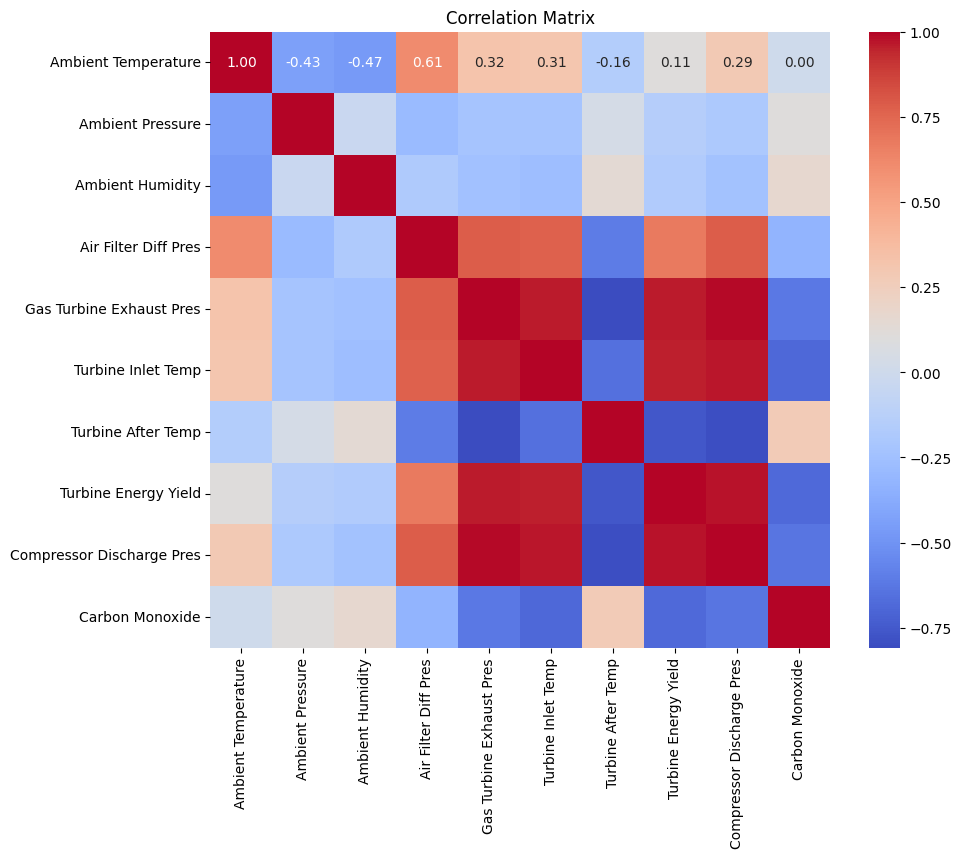

In [229]:
# Calculate the correlation matrix
corr_matrix = X_train_if.corr()
# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix")
plt.show()

In [230]:
corr_matrix

,Ambient Temperature,Ambient Pressure,Ambient Humidity,Air Filter Diff Pres,Gas Turbine Exhaust Pres,Turbine Inlet Temp,Turbine After Temp,Turbine Energy Yield,Compressor Discharge Pres,Carbon Monoxide
Ambient Temperature,1.000000,-0.434254,-0.467984,0.609201,0.323824,0.310121,-0.156689,0.106353,0.287292,0.003191
Ambient Pressure,-0.434254,1.000000,-0.035924,-0.286072,-0.224351,-0.224276,0.033689,-0.146232,-0.188371,0.104065
Ambient Humidity,-0.467984,-0.035924,1.000000,-0.172422,-0.248689,-0.267108,0.141315,-0.166984,-0.240240,0.160101
Air Filter Diff Pres,0.609201,-0.286072,-0.172422,1.000000,0.782110,0.768996,-0.604652,0.679744,0.782324,-0.332873
Gas Turbine Exhaust Pres,0.323824,-0.224351,-0.248689,0.782110,1.000000,0.958005,-0.807956,0.964045,0.990875,-0.617884
Turbine Inlet Temp,0.310121,-0.224276,-0.267108,0.768996,0.958005,1.000000,-0.652848,0.954441,0.968547,-0.687954
Turbine After Temp,-0.156689,0.033689,0.141315,-0.604652,-0.807956,-0.652848,1.000000,-0.761994,-0.796015,0.275253
Turbine Energy Yield,0.106353,-0.146232,-0.166984,0.679744,0.964045,0.954441,-0.761994,1.000000,0.977066,-0.683034
Compressor Discharge Pres,0.287292,-0.188371,-0.240240,0.782324,0.990875,0.968547,-0.796015,0.977066,1.000000,-0.632418
Carbon Monoxide,0.003191,0.104065,0.160101,-0.332873,-0.617884,-0.687954,0.275253,-0.683034,-0.632418,1.000000


In [231]:
X_train_ifc = X_train_if.copy()
X_test_ifc = X_test_if.copy()

In [232]:
X_train_ifc.drop(['Gas Turbine Exhaust Pres','Turbine Inlet Temp','Compressor Discharge Pres'], axis=1, inplace=True)
X_test_ifc.drop(['Gas Turbine Exhaust Pres','Turbine Inlet Temp','Compressor Discharge Pres'], axis=1, inplace=True)

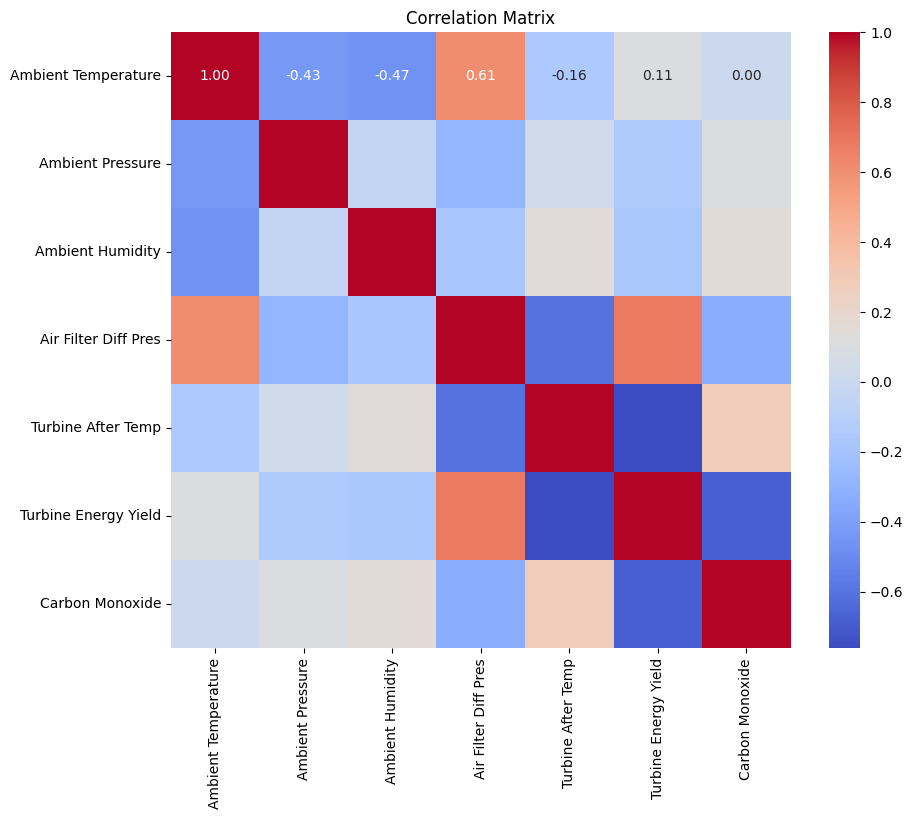

In [233]:
# Calculate the correlation matrix
corr_matrix = X_train_ifc.corr()
# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix")
plt.show()

In [234]:
corr_matrix

,Ambient Temperature,Ambient Pressure,Ambient Humidity,Air Filter Diff Pres,Turbine After Temp,Turbine Energy Yield,Carbon Monoxide
Ambient Temperature,1.000000,-0.434254,-0.467984,0.609201,-0.156689,0.106353,0.003191
Ambient Pressure,-0.434254,1.000000,-0.035924,-0.286072,0.033689,-0.146232,0.104065
Ambient Humidity,-0.467984,-0.035924,1.000000,-0.172422,0.141315,-0.166984,0.160101
Air Filter Diff Pres,0.609201,-0.286072,-0.172422,1.000000,-0.604652,0.679744,-0.332873
Turbine After Temp,-0.156689,0.033689,0.141315,-0.604652,1.000000,-0.761994,0.275253
Turbine Energy Yield,0.106353,-0.146232,-0.166984,0.679744,-0.761994,1.000000,-0.683034
Carbon Monoxide,0.003191,0.104065,0.160101,-0.332873,0.275253,-0.683034,1.000000


## Feature Engineering

In [235]:
X_train_ifc.var()

Ambient Temperature      42.294471
Ambient Pressure         29.367454
Ambient Humidity        164.419820
Air Filter Diff Pres      0.439808
Turbine After Temp        8.856566
Turbine Energy Yield    125.451293
Carbon Monoxide           0.844625
dtype: float64

In [236]:
X_train_ifcf= X_train_ifc.copy()
X_test_ifcf =X_test_ifc.copy()

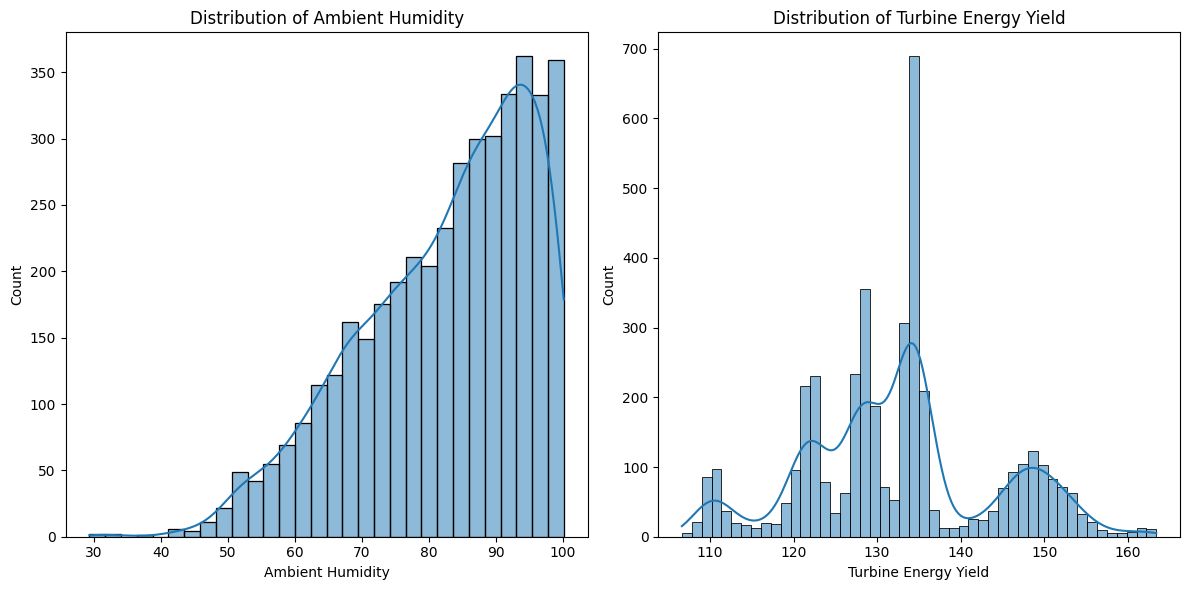

In [237]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train_ifcf is already defined and contains the data
# Plot the distribution of the two selected features: Ambient Humidity (iloc[:, 2]) and Turbine Energy Yield (iloc[:, 5])

plt.figure(figsize=(12, 6))

# Plot for Ambient Humidity (X_train_ifcf.iloc[:, 2])
plt.subplot(1, 2, 1)
sns.histplot(X_train_ifcf.iloc[:, 2], kde=True)
plt.title('Distribution of Ambient Humidity')

# Plot for Turbine Energy Yield (X_train_ifcf.iloc[:, 5])
plt.subplot(1, 2, 2)
sns.histplot(X_train_ifcf.iloc[:, 5], kde=True)
plt.title('Distribution of Turbine Energy Yield')

# Show plots
plt.tight_layout()
plt.show()


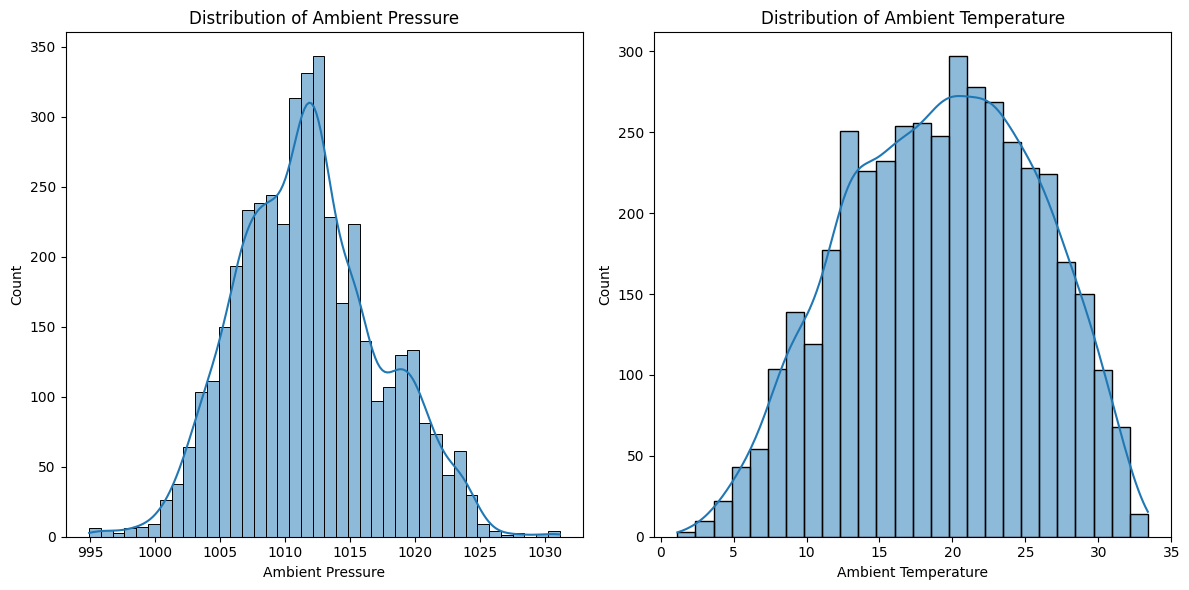

In [238]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train_ifcf is already defined and contains the data
# Plot the distribution of the two selected features: Ambient Humidity (iloc[:, 2]) and Turbine Energy Yield (iloc[:, 5])

plt.figure(figsize=(12, 6))

# Plot for Ambient Humidity (X_train_ifcf.iloc[:, 2])
plt.subplot(1, 2, 1)
sns.histplot(X_train_ifcf.iloc[:, 1], kde=True)
plt.title('Distribution of Ambient Pressure')

# Plot for Turbine Energy Yield (X_train_ifcf.iloc[:, 5])
plt.subplot(1, 2, 2)
sns.histplot(X_train_ifcf.iloc[:, 0], kde=True)
plt.title('Distribution of Ambient Temperature')

# Show plots
plt.tight_layout()
plt.show()

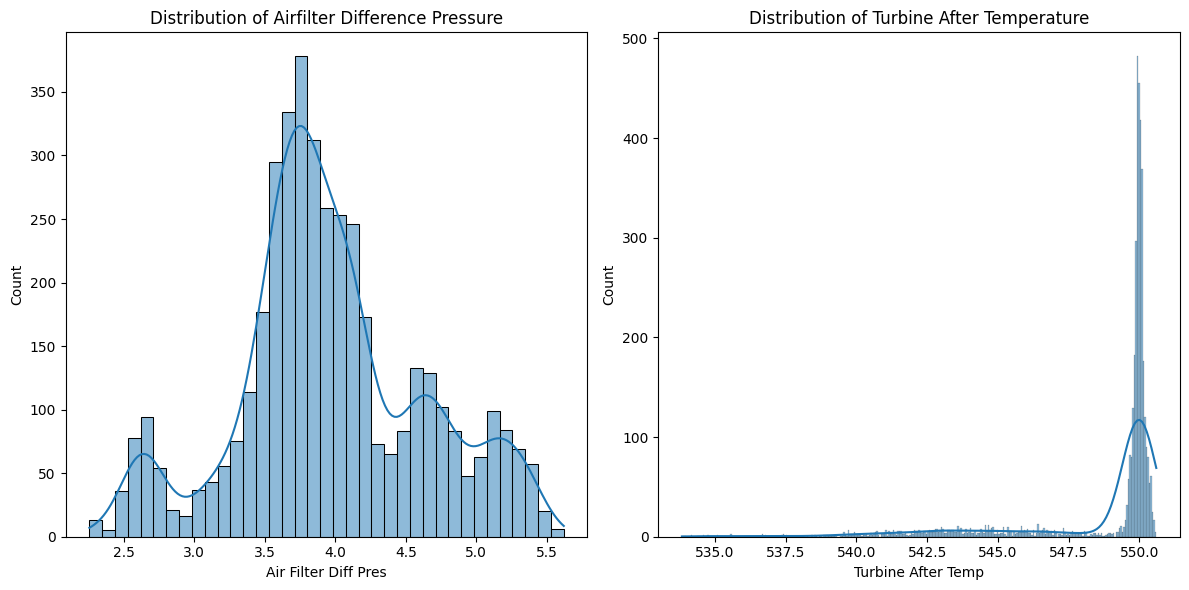

In [239]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train_ifcf is already defined and contains the data
# Plot the distribution of the two selected features: Ambient Humidity (iloc[:, 2]) and Turbine Energy Yield (iloc[:, 5])

plt.figure(figsize=(12, 6))

# Plot for Ambient Humidity (X_train_ifcf.iloc[:, 2])
plt.subplot(1, 2, 1)
sns.histplot(X_train_ifcf.iloc[:, 3], kde=True)
plt.title('Distribution of Airfilter Difference Pressure')

# Plot for Turbine Energy Yield (X_train_ifcf.iloc[:, 5])
plt.subplot(1, 2, 2)
sns.histplot(X_train_ifcf.iloc[:, 4], kde=True)
plt.title('Distribution of Turbine After Temperature')

# Show plots
plt.tight_layout()
plt.show()

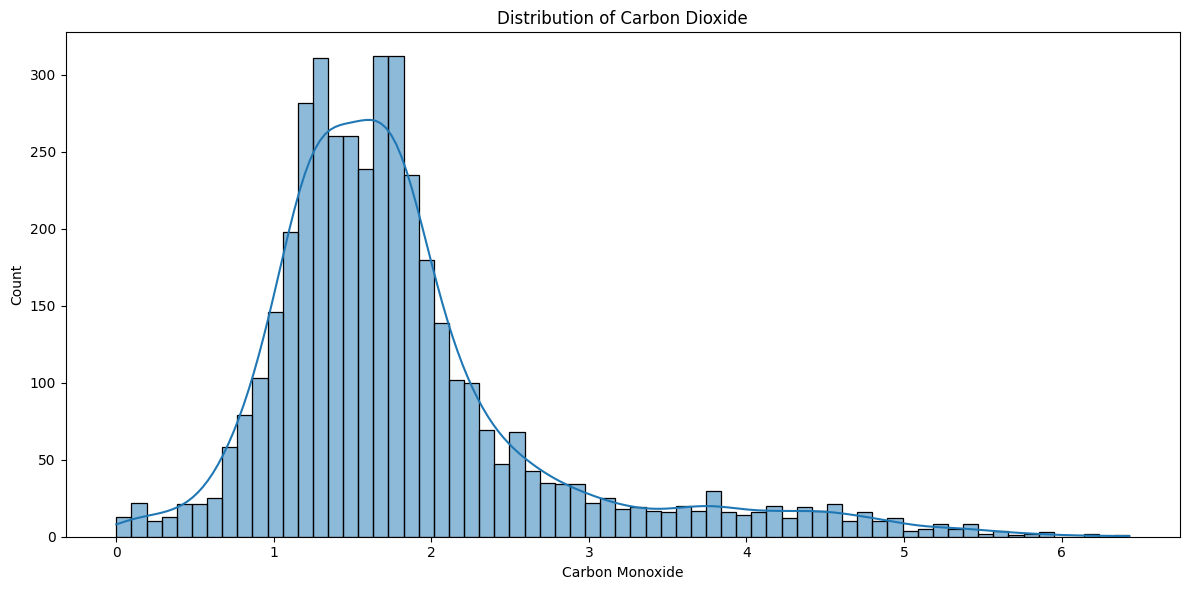

In [240]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train_ifcf is already defined and contains the data
# Plot the distribution of the two selected features: Ambient Humidity (iloc[:, 2]) and Turbine Energy Yield (iloc[:, 5])

plt.figure(figsize=(12, 6))
sns.histplot(X_train_ifcf.iloc[:, 6], kde=True)
plt.title('Distribution of Carbon Dioxide')

plt.tight_layout()
plt.show()

# Applied Yeo-Johnson Power Transformation for Normalizing Skewed Ambient Temperature and Humidity"

In [241]:
from sklearn.preprocessing import PowerTransformer

# Apply Yeo-Johnson transformation (handles both positive and negative values)
pt1 = PowerTransformer(method='yeo-johnson')
X_train_ifcf['PowerTrans_Ambient Humidity'] = pt1.fit_transform(X_train_ifcf[['Ambient Temperature']])
X_test_ifcf['PowerTrans_Ambient Humidity'] = pt1.transform(X_test_ifcf[['Ambient Temperature']])

pt2 = PowerTransformer(method='yeo-johnson')

X_train_ifcf['PowerTrans_Ambient Temperature'] = pt2.fit_transform(X_train_ifcf[['Ambient Humidity']])
X_test_ifcf['PowerTrans_Ambient Temperature'] = pt2.transform(X_test_ifcf[['Ambient Humidity']])

## Applied Box-Cox Power Transformation for Normalizing Turbine Energy Yield and Ambient Pressure

In [242]:
from scipy import stats

# Apply Box-Cox transformation (only for positive values)

X_train_ifcf[ 'Boxcox_Turbine Energy Yield'], fitted_lambda1 =  stats.boxcox(X_train_ifcf.iloc[:, 5] + 1)
X_test_ifcf[ 'Boxcox_Turbine Energy Yield'] =  stats.boxcox(X_test_ifcf.iloc[:, 5] + 1, lmbda=fitted_lambda1)


X_train_ifcf[ 'Boxcox_Ambient Pressure'], fitted_lambda2 =  stats.boxcox(X_train_ifcf.iloc[:, 1] + 1)
X_test_ifcf[ 'Boxcox_Ambient Pressure'] =  stats.boxcox(X_test_ifcf.iloc[:, 1] + 1,lmbda=fitted_lambda2)


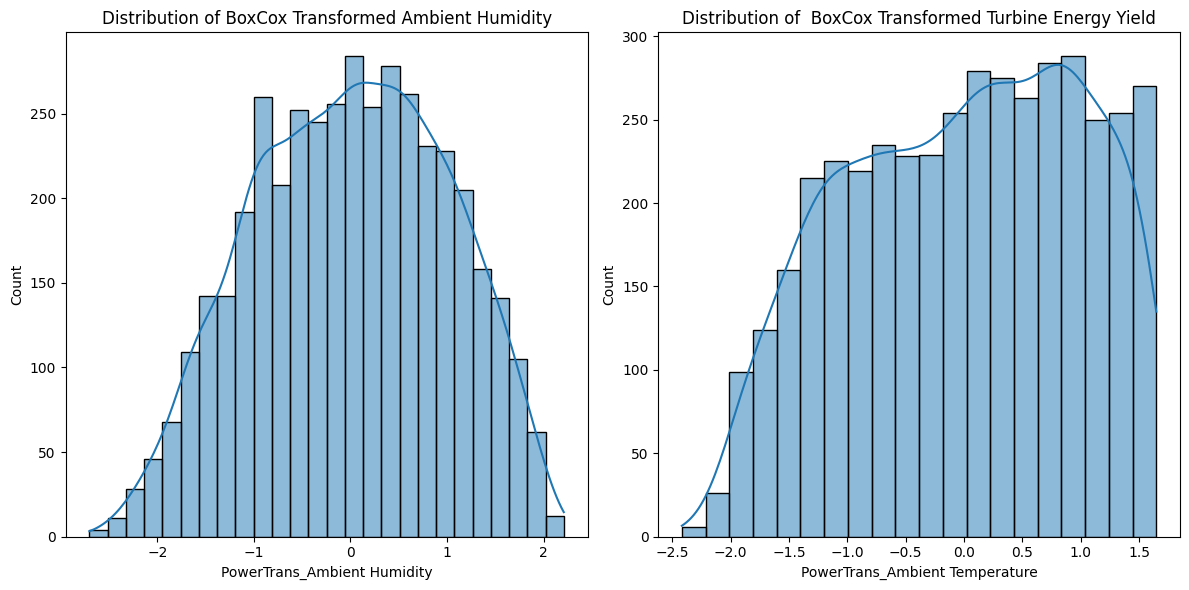

In [243]:
plt.figure(figsize=(12, 6))

# Plot for Ambient Humidity (X_train_ifcf.iloc[:, 7])
plt.subplot(1, 2, 1)
sns.histplot(X_train_ifcf.iloc[:, 7], kde=True)
plt.title('Distribution of BoxCox Transformed Ambient Humidity')

# Plot for Turbine Energy Yield (X_train_ifcf.iloc[:, 8])
plt.subplot(1, 2, 2)
sns.histplot(X_train_ifcf.iloc[:, 8], kde=True)
plt.title('Distribution of  BoxCox Transformed Turbine Energy Yield')


# Show plots
plt.tight_layout()
plt.show()

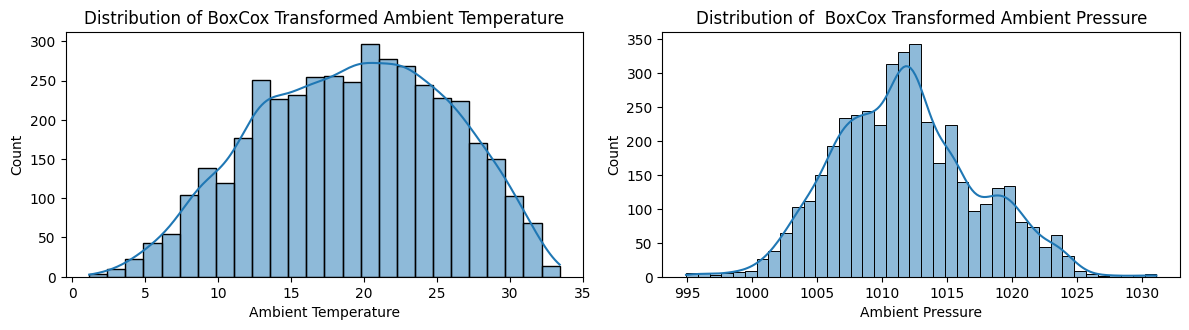

In [244]:

plt.figure(figsize=(12, 6))
# Plot for Ambient Humidity (X_train_ifcf.iloc[:, 0])
plt.subplot(2, 2, 1)
sns.histplot(X_train_ifcf.iloc[:, 0], kde=True)
plt.title('Distribution of BoxCox Transformed Ambient Temperature')

# Plot for Turbine Energy Yield (X_train_ifcf.iloc[:, 1])
plt.subplot(2, 2, 2)
sns.histplot(X_train_ifcf.iloc[:, 1], kde=True)
plt.title('Distribution of  BoxCox Transformed Ambient Pressure')

# Show plots
plt.tight_layout()
plt.show()


In [245]:
X_train_ifcf.var()

Ambient Temperature               4.229447e+01
Ambient Pressure                  2.936745e+01
Ambient Humidity                  1.644198e+02
Air Filter Diff Pres              4.398077e-01
Turbine After Temp                8.856566e+00
Turbine Energy Yield              1.254513e+02
Carbon Monoxide                   8.446254e-01
PowerTrans_Ambient Humidity       1.000239e+00
PowerTrans_Ambient Temperature    1.000239e+00
Boxcox_Turbine Energy Yield       2.049137e-02
Boxcox_Ambient Pressure           1.525894e-30
dtype: float64

In [246]:
X_train_ifcf

,Ambient Temperature,Ambient Pressure,Ambient Humidity,Air Filter Diff Pres,Turbine After Temp,Turbine Energy Yield,Carbon Monoxide,PowerTrans_Ambient Humidity,PowerTrans_Ambient Temperature,Boxcox_Turbine Energy Yield,Boxcox_Ambient Pressure
3924,27.953,1000.8,77.474,4.1116,550.37,128.25,0.80294,1.352532,-0.554609,6.415723,0.069905
1023,14.592,1004.5,95.045,3.7219,550.11,134.43,1.40590,-0.716171,1.060898,6.495375,0.069905
1969,13.205,1008.2,87.611,3.6330,550.10,134.67,1.64500,-0.927140,0.299914,6.498403,0.069905
172,12.100,1017.8,91.324,2.7109,548.95,110.05,2.86170,-1.094544,0.665080,6.159687,0.069905
5679,21.314,1017.0,50.280,4.1384,549.91,121.45,2.54180,0.317393,-1.972549,6.324059,0.069905
...,...,...,...,...,...,...,...,...,...,...,...
5977,21.947,1018.4,82.910,4.1650,550.05,121.26,2.47600,0.415539,-0.121496,6.321433,0.069905
5672,13.867,1016.0,84.170,3.8886,549.92,121.55,3.27390,-0.826559,-0.012917,6.325440,0.069905
1499,14.153,1008.0,85.351,3.6383,550.17,133.51,1.53280,-0.783042,0.091736,6.483725,0.069905
2072,20.137,1012.7,81.031,3.7874,549.94,135.00,1.50850,0.135242,-0.277614,6.502558,0.069905


In [247]:
X_test_ifcf

,Ambient Temperature,Ambient Pressure,Ambient Humidity,Air Filter Diff Pres,Turbine After Temp,Turbine Energy Yield,Carbon Monoxide,PowerTrans_Ambient Humidity,PowerTrans_Ambient Temperature,Boxcox_Turbine Energy Yield,Boxcox_Ambient Pressure
4620,25.280,1010.9,93.743,3.4763,549.97,109.70,4.4403,0.934293,0.918927,6.154407,0.069905
5026,24.307,1007.9,85.816,5.1710,543.80,147.99,1.1408,0.782524,0.133715,6.659381,0.069905
143,10.942,1017.0,93.939,2.7280,546.94,109.22,5.4120,-1.269283,0.940058,6.147141,0.069905
2038,17.310,1011.3,82.128,2.9587,550.41,109.26,5.5935,-0.300312,-0.187306,6.147747,0.069905
4822,28.238,1013.4,57.166,4.0989,550.25,121.59,2.7281,1.397233,-1.717976,6.325992,0.069905
...,...,...,...,...,...,...,...,...,...,...,...
7026,12.939,1012.3,80.667,3.8238,539.01,156.34,2.6637,-0.967494,-0.307064,6.753872,0.069905
5168,23.825,1005.2,98.586,5.1459,547.35,145.60,1.2635,0.707439,1.466371,6.631466,0.069905
5823,22.116,1021.5,67.543,4.3397,550.02,124.87,1.9214,0.441763,-1.207212,6.370712,0.069905
3415,20.577,1008.4,93.006,3.2237,550.28,111.03,5.1570,0.203283,0.840230,6.174394,0.069905


## Dropping original variables which are transformed using Power Transformation and Box Cox methods in Train and Test data

In [248]:
X_train_ifcf.drop(['Ambient Temperature',	'Ambient Pressure',	'Ambient Humidity','Turbine Energy Yield'], axis=1, inplace=True)

In [249]:
X_test_ifcf.drop(['Ambient Temperature',	'Ambient Pressure',	'Ambient Humidity','Turbine Energy Yield'], axis=1, inplace=True)

In [250]:
X_train_ifcf

,Air Filter Diff Pres,Turbine After Temp,Carbon Monoxide,PowerTrans_Ambient Humidity,PowerTrans_Ambient Temperature,Boxcox_Turbine Energy Yield,Boxcox_Ambient Pressure
3924,4.1116,550.37,0.80294,1.352532,-0.554609,6.415723,0.069905
1023,3.7219,550.11,1.40590,-0.716171,1.060898,6.495375,0.069905
1969,3.6330,550.10,1.64500,-0.927140,0.299914,6.498403,0.069905
172,2.7109,548.95,2.86170,-1.094544,0.665080,6.159687,0.069905
5679,4.1384,549.91,2.54180,0.317393,-1.972549,6.324059,0.069905
...,...,...,...,...,...,...,...
5977,4.1650,550.05,2.47600,0.415539,-0.121496,6.321433,0.069905
5672,3.8886,549.92,3.27390,-0.826559,-0.012917,6.325440,0.069905
1499,3.6383,550.17,1.53280,-0.783042,0.091736,6.483725,0.069905
2072,3.7874,549.94,1.50850,0.135242,-0.277614,6.502558,0.069905


In [251]:
X_test_ifcf

,Air Filter Diff Pres,Turbine After Temp,Carbon Monoxide,PowerTrans_Ambient Humidity,PowerTrans_Ambient Temperature,Boxcox_Turbine Energy Yield,Boxcox_Ambient Pressure
4620,3.4763,549.97,4.4403,0.934293,0.918927,6.154407,0.069905
5026,5.1710,543.80,1.1408,0.782524,0.133715,6.659381,0.069905
143,2.7280,546.94,5.4120,-1.269283,0.940058,6.147141,0.069905
2038,2.9587,550.41,5.5935,-0.300312,-0.187306,6.147747,0.069905
4822,4.0989,550.25,2.7281,1.397233,-1.717976,6.325992,0.069905
...,...,...,...,...,...,...,...
7026,3.8238,539.01,2.6637,-0.967494,-0.307064,6.753872,0.069905
5168,5.1459,547.35,1.2635,0.707439,1.466371,6.631466,0.069905
5823,4.3397,550.02,1.9214,0.441763,-1.207212,6.370712,0.069905
3415,3.2237,550.28,5.1570,0.203283,0.840230,6.174394,0.069905


## Scaling using Standard Scaler as the outliers are removed already

In [252]:
columns = ['Air Filter Diff Pres',	'Turbine After Temp',	'Carbon Monoxide',	'PowerTrans_Ambient Humidity',
'PowerTrans_Ambient Temperature',	'Boxcox_Turbine Energy Yield',	'Boxcox_Ambient Pressure']

scl = StandardScaler()

scl.fit(X_train_ifcf) ## learn to scale from the training data

X_train_ifcf_s = pd.DataFrame(scl.transform(X_train_ifcf),columns=columns) ## scale the training data

X_test_ifcf_s = pd.DataFrame(scl.transform(X_test_ifcf),columns=columns) ## use learning from training to scale the testing data

In [253]:
X_train_ifcf_s

,Air Filter Diff Pres,Turbine After Temp,Carbon Monoxide,PowerTrans_Ambient Humidity,PowerTrans_Ambient Temperature,Boxcox_Turbine Energy Yield,Boxcox_Ambient Pressure
0,0.221979,0.586525,-1.108195,1.352532,-0.554609,-0.344261,1.387779e-17
1,-0.365715,0.499149,-0.452037,-0.716171,1.060898,0.212242,1.387779e-17
2,-0.499782,0.495788,-0.191842,-0.927140,0.299914,0.233394,1.387779e-17
3,-1.890370,0.109317,1.132205,-1.094544,0.665080,-2.133080,1.387779e-17
4,0.262395,0.431936,0.784081,0.317393,-1.972549,-0.984677,1.387779e-17
...,...,...,...,...,...,...,...
4178,0.302510,0.478985,0.712475,0.415539,-0.121496,-1.003022,1.387779e-17
4179,-0.114320,0.435297,1.580772,-0.826559,-0.012917,-0.975032,1.387779e-17
4180,-0.491789,0.519312,-0.313941,-0.783042,0.091736,0.130849,1.387779e-17
4181,-0.266936,0.442018,-0.340385,0.135242,-0.277614,0.262424,1.387779e-17


# Dimensionality Reduction

## Applying PCA on data on which outliers are removed and data is scaled

In [254]:
from sklearn.decomposition import PCA
pca = PCA()

In [255]:
pca.fit(X_train_ifcf_s)

PCA()

In [256]:
pca.explained_variance_ratio_ ## variance/change explained by each principal component

array([0.48296148, 0.23103756, 0.14831087, 0.09966669, 0.02597076,
       0.01205263, 0.        ])

In [257]:
np.cumsum(pca.explained_variance_ratio_) ## cummulative sum of the variances

array([0.48296148, 0.71399905, 0.86230992, 0.9619766 , 0.98794737,
       1.        , 1.        ])

In [258]:
pca = PCA(n_components=5) # new instantiation to extract the 5 most dominant principal components

X_train_ifcf_sp = pca.fit_transform(X_train_ifcf_s) # learn the 5 components, and transfor train data

X_test_ifcf_sp = pca.transform(X_test_ifcf_s) # transform test data based on 5 learned components

## Feature Selection

## Selecting features on outlier removed, scaled data, dimensionality reduced data

In [259]:
f, p = f_regression(X_train_ifcf_sp, y_train_if)
f /= np.max(f) # normalize f score

mi = mutual_info_regression(X_train_ifcf_sp, y_train_if)
mi /= np.max(mi) # normalize mi score

Text(0.5, 0, 'features')

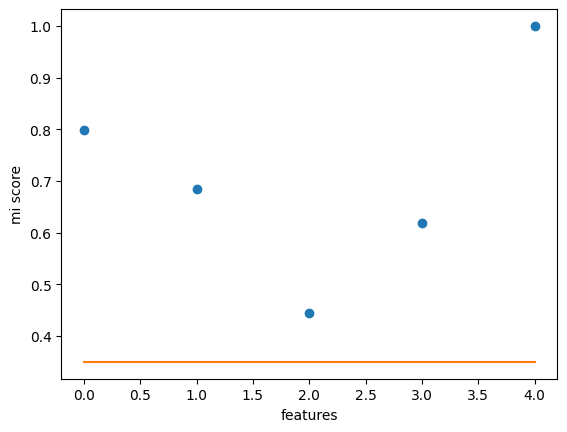

In [260]:
plt.figure()
plt.plot(mi, 'o')
plt.plot(0.35*np.ones(len(mi)))
plt.ylabel('mi score')
plt.xlabel('features')

## find the threshold

Text(0.5, 0, 'features')

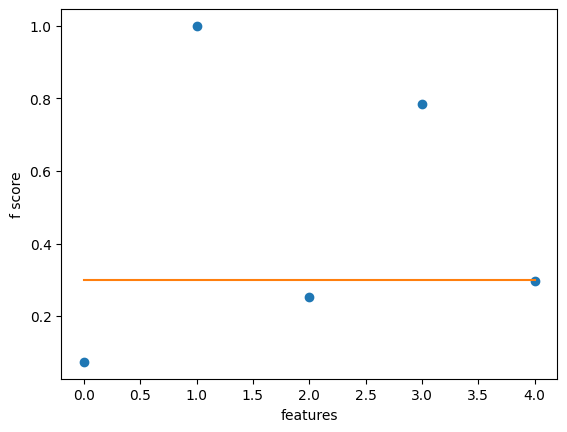

In [261]:
plt.figure()
plt.plot(f, 'o')
plt.plot(0.3*np.ones(len(f)))
plt.ylabel('f score')
plt.xlabel('features')

## find the threshold

In [262]:
X_train_ifcf_spr = X_train_ifcf_sp[:,(f > 0.3) | (mi > 0.30)]
X_test_ifcf_spr= X_test_ifcf_sp[:,(f > 0.3) | (mi > 0.3)]

# 3. Model Training and Testing

In [263]:
models = {
    'Linear Regression': LinearRegression(),
    'ElasticNet Regression': ElasticNet(),
    'K-Nearest Neighbors Regression': KNeighborsRegressor(),
    'Support Vector Regression': SVR(),
    'Random Forest Regression': RandomForestRegressor()
}

param_grids = {
    
    'Linear Regression': {
        'fit_intercept': [True, False],      
        'copy_X': [True, False],          
        'positive': [True, False]   # Ensures the coefficients remain positive if True
    },
    'Random Forest Regression': {
        'n_estimators': [50, 75, 100],     
        'max_depth': [4,5,7,9],          
        'min_samples_split': [2, 5, 10],    
        'min_samples_leaf': [1, 2, 4],      
        'max_features': [2,3],
    },
    
    'K-Nearest Neighbors Regression': {
        'n_neighbors': [3, 5, 10],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'leaf_size': [30, 40, 50],
        'p': [1, 2]
    },
    'ElasticNet Regression': {
        'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10],
        'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
        'max_iter': [1000, 5000, 10000],
        'tol': [1e-5, 1e-4, 1e-3],
        'selection': ['cyclic', 'random']
    },

    'Support Vector Regression': {
        'kernel': ['linear', 'poly', 'rbf'],      
        'C': [0.01, 0.1, 10, 100],     
        'epsilon': [0.001, 0.01, 0.1],           
        'degree': [2, 3],      
        'tol': [1e-3, 1e-4]
    },
}


In [264]:
print(type(models)) 

<class 'dict'>


In [265]:
grid_search11 = GridSearchCV(estimator=models['Linear Regression'],
                               param_grid=param_grids['Linear Regression'],
                               cv=5,           # 5-fold cross-validation
                               n_jobs=-1)      # Use all processors
grid_search11.fit(X_train_ifcf_spr, y_train_if)
print(f"Best parameters for 'Linear Regression': {grid_search11.best_params_}")

Best parameters for 'Linear Regression': {'copy_X': True, 'fit_intercept': True, 'positive': False}


In [266]:
grid_search22 = GridSearchCV(estimator=models['K-Nearest Neighbors Regression'],
                               param_grid=param_grids['K-Nearest Neighbors Regression'],
                               cv=5,           # 5-fold cross-validation
                               n_jobs=-1)      # Use all processors
grid_search22.fit(X_train_ifcf_spr, y_train_if)
print(f"Best parameters for 'K-Nearest Neighbors Regression': {grid_search22.best_params_}")

Best parameters for 'K-Nearest Neighbors Regression': {'algorithm': 'brute', 'leaf_size': 30, 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}


In [267]:
grid_search33 = GridSearchCV(estimator=models['Support Vector Regression'],
                               param_grid=param_grids['Support Vector Regression'],
                               cv=5,           # 5-fold cross-validation
                               n_jobs=-1, verbose=3)      # Use all processors
grid_search33.fit(X_train_ifcf_spr, y_train_if)
print(f"Best parameters for 'Support Vector Regression': {grid_search33.best_params_}")

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters for 'Support Vector Regression': {'C': 100, 'degree': 2, 'epsilon': 0.001, 'kernel': 'rbf', 'tol': 0.0001}


In [268]:
grid_search42 = GridSearchCV(estimator=models['Random Forest Regression'],
                               param_grid=param_grids['Random Forest Regression'],
                               cv=5,           # 5-fold cross-validation
                               n_jobs=-1, verbose=3)      # Use all processors
grid_search42.fit(X_train_ifcf_spr, y_train_if)
print(f"Best parameters for 'Random Forest Regression': {grid_search42.best_params_}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters for 'Random Forest Regression': {'max_depth': 9, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [269]:
grid_search62 = GridSearchCV(estimator=models['ElasticNet Regression'],
                               param_grid=param_grids['ElasticNet Regression'],
                               cv=5,           # 5-fold cross-validation
                               n_jobs=-1, verbose=3)      # Use all processors
grid_search62.fit(X_train_ifcf_spr, y_train_if)
print(f"Best parameters for 'ElasticNet Regression': {grid_search62.best_params_}")

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Best parameters for 'ElasticNet Regression': {'alpha': 0.001, 'l1_ratio': 0.9, 'max_iter': 10000, 'selection': 'random', 'tol': 0.001}


## Checking for memorization and generalization on train, test datasets on which  outliers are removed using isolation forest, removed collinear features, performed feature engineering, scaled, dimensionality reduction using PCA and features are selected using F Statistic score and Mutual Info score for Regression

In [270]:
# memorization and generalization performances of the optimal RF regressor model

print('memorization performance for Linear Regression: ', grid_search11.score(X_train_ifcf_spr, y_train_if)) # memorization

print('generalization performance for Linear Regression: ', grid_search11.score(X_test_ifcf_spr, y_test_if))  # generalization

# performance of the best model for a split

memorization performance for Linear Regression:  0.6593008526520947
generalization performance for Linear Regression:  0.5980777509930613


In [271]:
# memorization and generalization performances of the optimal RF regressor model

print('memorization performance for K-Nearest Neighbors Regression: ', grid_search22.score(X_train_ifcf_spr, y_train_if)) # memorization

print('generalization performance for K-Nearest Neighbors Regression:', grid_search22.score(X_test_ifcf_spr, y_test_if))  # generalization

memorization performance for K-Nearest Neighbors Regression:  0.9999999999999961
generalization performance for K-Nearest Neighbors Regression: 0.8188082407340926


In [272]:
# memorization and generalization performances of the optimal RF regressor model

print('memorization performance for SVR Regression: ', grid_search33.score(X_train_ifcf_spr, y_train_if)) # memorization

print('generalization performance for SVR Regression:', grid_search33.score(X_test_ifcf_spr, y_test_if))  # generalization

memorization performance for SVR Regression:  0.844832541946504
generalization performance for SVR Regression: 0.7944877321867789


In [273]:
# memorization and generalization performances of the optimal RF regressor model

print('memorization performance for Random Forest Regression: ', grid_search42.score(X_train_ifcf_spr, y_train_if)) # memorization

print('generalization performance Random Forest Regression',grid_search42.score(X_test_ifcf_spr, y_test_if))  # generalization

memorization performance for Random Forest Regression:  0.9214766864642345
generalization performance Random Forest Regression 0.785543485705064


In [274]:

print('memorization performance for ElasticNet Regression: ', grid_search62.score(X_train_ifcf_spr, y_train_if)) # memorization

print('generalization performance for ElasticNet Regression:', grid_search62.score(X_test_ifcf_spr, y_test_if))

memorization performance for ElasticNet Regression:  0.6593005305188611
generalization performance for ElasticNet Regression: 0.5980676261459725


# Comparing Memorization and Generalization

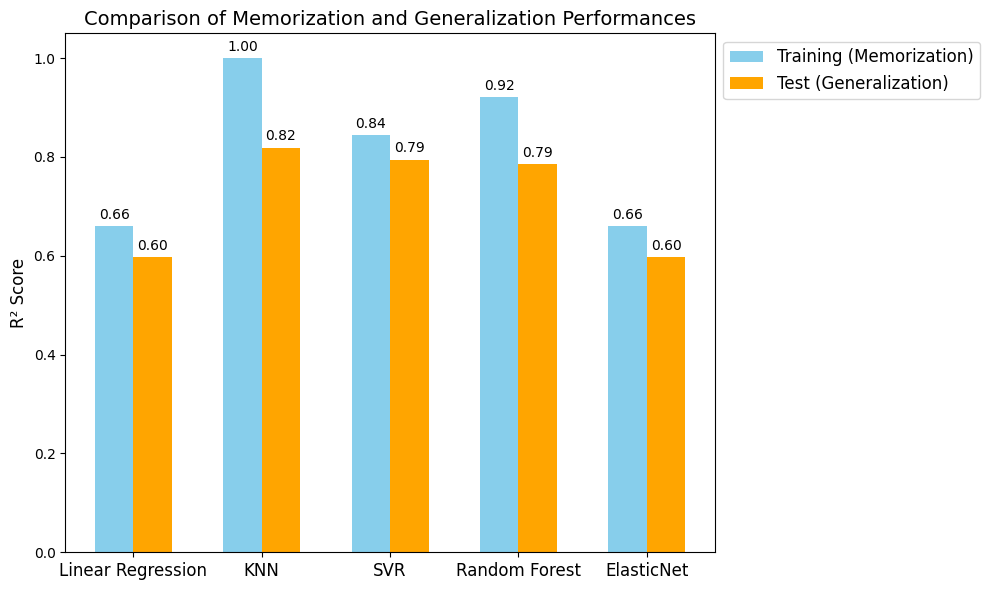

Linear Regression - Training R²: 0.6593, Test R²: 0.5981
KNN - Training R²: 1.0000, Test R²: 0.8188
SVR - Training R²: 0.8448, Test R²: 0.7945
Random Forest - Training R²: 0.9215, Test R²: 0.7855
ElasticNet - Training R²: 0.6593, Test R²: 0.5981


In [275]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# Assuming these are your models with the best hyperparameters after GridSearchCV
models = ['Linear Regression', 'KNN', 'SVR', 'Random Forest', 'ElasticNet']

# Placeholder for memorization (training) and generalization (test) scores
train_scores1 = []
test_scores1 = []

# Adding the R² score of each model for training (memorization) and test (generalization)
# Assuming you have already performed GridSearchCV for each model (e.g., grid_search11 for Linear Regression)
train_scores1.append(grid_search11.score(X_train_ifcf_spr, y_train_if))  # Linear Regression train score
test_scores1.append(grid_search11.score(X_test_ifcf_spr, y_test_if))  # Linear Regression test score

train_scores1.append(grid_search22.score(X_train_ifcf_spr, y_train_if))  # KNN train score
test_scores1.append(grid_search22.score(X_test_ifcf_spr, y_test_if))  # KNN test score

train_scores1.append(grid_search33.score(X_train_ifcf_spr, y_train_if))  # SVR train score
test_scores1.append(grid_search33.score(X_test_ifcf_spr, y_test_if))  # SVR test score

train_scores1.append(grid_search42.score(X_train_ifcf_spr, y_train_if))  # Random Forest train score
test_scores1.append(grid_search42.score(X_test_ifcf_spr, y_test_if))  # Random Forest test score

train_scores1.append(grid_search62.score(X_train_ifcf_spr, y_train_if))  # ElasticNet train score
test_scores1.append(grid_search62.score(X_test_ifcf_spr, y_test_if))  # ElasticNet test score

# Plotting the R² scores for both training and test sets
x = np.arange(len(models))  # Label locations
width = 0.3  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figure size

# Create bars for training (memorization) and test (generalization) scores
bar1 = ax.bar(x - width/2, train_scores1, width, label='Training (Memorization)', color='skyblue')
bar2 = ax.bar(x + width/2, test_scores1, width, label='Test (Generalization)', color='orange')

# Add labels, title, and custom x-axis tick labels
ax.set_ylabel('R² Score', fontsize=12)
ax.set_title('Comparison of Memorization and Generalization Performances', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=12)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)  # Move legend outside

# Add value labels on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)

# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()

# Print scores for easier interpretation
for i, model in enumerate(models):
    print(f"{model} - Training R²: {train_scores1[i]:.4f}, Test R²: {test_scores1[i]:.4f}")


## Reliable Techniques for performing predictive Task from the above plot are:

1. Random Forest Regression:
   
- Performance: Random Forest has an R² score of 0.92 on the training set and 0.79 on the test set, indicating it is able to generalize well without overfitting significantly.
- Why Reliable: Random Forest is an ensemble learning method that works by averaging the predictions of multiple decision trees. This method helps in reducing variance and overfitting while capturing nonlinear relationships between features and the target variable (NOx emissions). It is robust to outliers and works well with datasets that have complex feature interactions, which is relevant in this context given the interaction between turbine and environmental variables.
  
2. Support Vector Regression (SVR):
- Performance: SVR also shows solid performance with an R² score of 0.84 on the training set and 0.79 on the test set, indicating consistent generalization.
- Why Reliable: SVR is effective for capturing complex relationships, especially in cases where the data might have high dimensionality or nonlinear patterns. SVR with kernel (radial basis function (RBF)) can effectively model the interactions between variables without overfitting. It is particularly useful when there are few data points that define the boundary of the response, making it reliable for regression tasks like predicting NOx emissions with nonlinear patterns.
  
Why These Techniques Are Reliable:

- Nonlinear Modeling: Both Random Forest and SVR can capture nonlinear relationships between features and the target variable, which is likely present in the dataset (e.g., turbine temperature, pressure, and ambient conditions influencing NOx emissions).
- Robustness to Overfitting: The difference between the training and test scores for both Random Forest and SVR is relatively small, indicating that these models generalize well to unseen data. Random Forest, in particular, is less prone to overfitting because of its ensemble nature, while SVR uses regularization parameters (like C and epsilon) to avoid overfitting.
-Flexibility: Random Forest can handle large feature spaces and capture complex interactions between features, while SVR's use of kernel allows it to model nonlinear relationships, making both methods versatile and adaptable for a wide range of data characteristics.

# 4. Additional Analysis

## Impact of size of Training Data

In [276]:
len(X_train)

4809

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Training size: 20.0%
Train R² score: 0.8631
Test (Generalization) R² score: 0.7181
--------------------------------------------------
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Training size: 40.0%
Train R² score: 0.8441
Test (Generalization) R² score: 0.7682
--------------------------------------------------
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Training size: 60.0%
Train R² score: 0.8561
Test (Generalization) R² score: 0.7872
--------------------------------------------------
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Training size: 80.0%
Train R² score: 0.8453
Test (Generalization) R² score: 0.7793
--------------------------------------------------
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Training size: 99.0%
Train R² score: 0.8450
Test (Generalization) R² score: 0.7951
--------------------------------------------------
Summary of the 

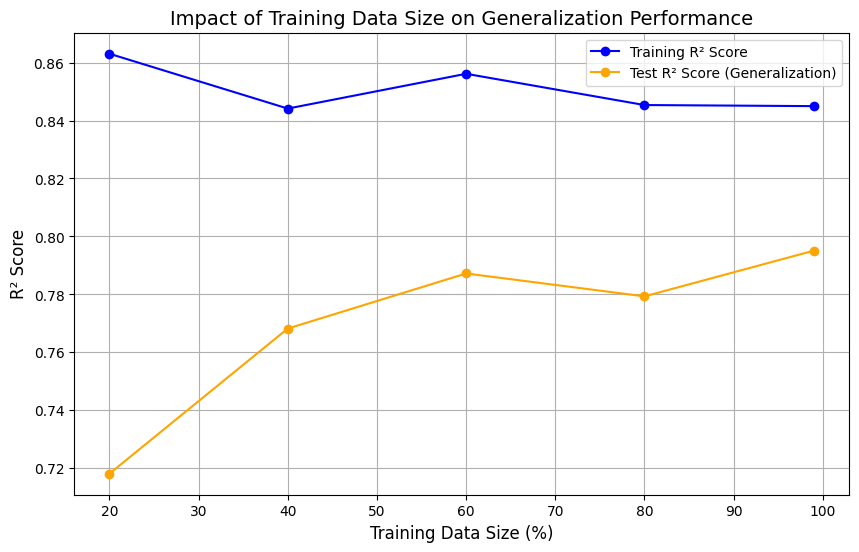

In [277]:
# Training data: X_train_ifcf_spr, y_train_if
train_sizes = [0.20, 0.40, 0.60, 0.80, 0.99]  # Proportions of training data to use
train_scores = []
test_scores = []
columns = ['Air Filter Diff Pres',	'Turbine After Temp',	'Carbon Monoxide',	'PowerTrans_Ambient Humidity',
'PowerTrans_Ambient Temperature',	'Boxcox_Turbine Energy Yield',	'Boxcox_Ambient Pressure']

# Loop through the different training sizes
for size in train_sizes:
    # Randomly sample the training data based on the size
    X_train_sampled, _, y_train_sampled, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)

    X_trains_if =X_train_sampled[out_if.predict(X_train_sampled)==1] ## inlier training target set
    y_trains_if =y_train_sampled[out_if.predict(X_train_sampled)==1] ## inlier testing target set
    X_trains_ifc =X_trains_if.copy()
    X_trains_ifc.drop(['Gas Turbine Exhaust Pres','Turbine Inlet Temp','Compressor Discharge Pres'], axis=1, inplace=True)
    X_trains_ifcf = X_trains_ifc.copy()
    X_trains_ifcf['PowerTrans_Ambient Humidity'] = pt1.transform(X_trains_ifcf[['Ambient Temperature']])
    X_trains_ifcf['PowerTrans_Ambient Temperature'] = pt2.transform(X_trains_ifcf[['Ambient Humidity']])
    X_trains_ifcf[ 'Boxcox_Turbine Energy Yield'] =  stats.boxcox(X_trains_ifcf.iloc[:, 5] + 1, lmbda=fitted_lambda1)
    X_trains_ifcf[ 'Boxcox_Ambient Pressure'] =  stats.boxcox(X_trains_ifcf.iloc[:, 1] + 1,lmbda=fitted_lambda2)

    X_trains_ifcf.drop(['Ambient Temperature',	'Ambient Pressure',	'Ambient Humidity','Turbine Energy Yield'], axis=1, inplace=True)
    X_trains_ifcf_s = pd.DataFrame(scl.transform(X_trains_ifcf),columns=columns) ## scale the training data
    X_trains_ifcf_sp = pca.transform(X_trains_ifcf_s) # transform test data based on 5 learned components
    X_trains_ifcf_spr = X_trains_ifcf_sp[:,(f > 0.3) | (mi > 0.30)]
    
    # Fit the model on the sampled training data
    grid_search33.fit(X_trains_ifcf_spr, y_trains_if)
    
    # Evaluate the model on the training set and test set
    train_r2 = r2_score(y_trains_if, grid_search33.predict(X_trains_ifcf_spr))
    test_r2 = r2_score(y_test_if, grid_search33.predict(X_test_ifcf_spr))
    
    # Store the scores
    train_scores.append(train_r2)
    test_scores.append(test_r2)
    
    # Print results for each training size
    print(f"Training size: {size*100}%")
    print(f"Train R² score: {train_r2:.4f}")
    print(f"Test (Generalization) R² score: {test_r2:.4f}")
    print("-" * 50)

# Summarizing results
print("Summary of the impact of training size on generalization performance:")
for i, size in enumerate(train_sizes):
    print(f"Training size: {size*100}%, Train R²: {train_scores[i]:.4f}, Test R²: {test_scores[i]:.4f}")

# Plotting the impact of training size on generalization performance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot([size * 100 for size in train_sizes], train_scores, marker='o', label='Training R² Score', color='blue')
plt.plot([size * 100 for size in train_sizes], test_scores, marker='o', label='Test R² Score (Generalization)', color='orange')
plt.xlabel('Training Data Size (%)', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.title('Impact of Training Data Size on Generalization Performance', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


## Analysis of the Impact of Training Dataset Size on Generalization Performance:

As the training dataset size increases, the generalization performance of the model improves steadily. Here's a detailed analysis:

1. Training R² Score:

- At 20% training size, the model achieves a training R² score of 0.8631.
- As the training size increases to 60%, the training R² stabilizes around 0.8561 to 0.8450, suggesting the model has sufficient data to learn from without overfitting. This slight fluctuation indicates that the model is generalizing well with the increase in training data.

2. Test R² Score (Generalization):

- The test R² starts at 0.7181 when using only 20% of the data for training, which shows reasonable performance but leaves room for improvement.
- As the training data increases to 40%, the test R² improves to 0.7682, reflecting better generalization.
- The test R² continues to improve gradually as more data is introduced, reaching 0.7951 at 99% training size. This shows that more training data helps the model generalize better and reduces potential overfitting.

3. Conclusion:

- As the training size increases, both the training and test R² scores improve, but the test R² shows more significant gains. This indicates that the model benefits from more data to generalize well, with diminishing returns beyond 60-80% of the training data.
- The best generalization performance is observed with 99% of the training data, where the test R² reaches 0.7951. Therefore, increasing the training dataset size improves generalization, but the most substantial improvements happen between 20% and 60% of the data.

In summary, more training data leads to better generalization performance, but beyond a certain point (~80%), the improvement becomes marginal.

# Impact of Sequence of Preprocessing steps

## Using hyperparameter tuning finding best params at each step

In [278]:
models = {
    'Linear Regression': LinearRegression(),
    'ElasticNet Regression': ElasticNet(),
    'K-Nearest Neighbors Regression': KNeighborsRegressor(),
    'Support Vector Regression': SVR(),
    'Random Forest Regression': RandomForestRegressor()
}

param_grids = {
    
    'Linear Regression': {
        'fit_intercept': [True, False],      
        'copy_X': [True, False],          
        'positive': [True, False]   # Ensures the coefficients remain positive if True
    },
    'Random Forest Regression': {
        'n_estimators': [50, 75, 100],     
        'max_depth': [4,5,7,9],          
        'min_samples_split': [2, 5, 10],    
        'min_samples_leaf': [1, 2, 4],      
        'max_features': [2,3],
    },
    
    'K-Nearest Neighbors Regression': {
        'n_neighbors': [3, 5, 10],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'leaf_size': [30, 40, 50],
        'p': [1, 2]
    },
    'ElasticNet Regression': {
        'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10],
        'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
        'max_iter': [1000, 5000, 10000],
        'tol': [1e-5, 1e-4, 1e-3],
        'selection': ['cyclic', 'random']
    },

    'Support Vector Regression': {
        'kernel': ['linear', 'poly', 'rbf'],      
        'C': [0.01, 0.1, 10, 100],     
        'epsilon': [0.001, 0.01, 0.1],           
        'degree': [2, 3],      
        'tol': [1e-3, 1e-4]
    },
}


In [279]:
## Checking model memorization on raw dataset
grid_search331 = GridSearchCV(estimator=models['Support Vector Regression'],
                               param_grid=param_grids['Support Vector Regression'],
                               cv=5,           # 5-fold cross-validation
                               n_jobs=-1, verbose=3)      # Use all processors
grid_search331.fit(X_train, y_train)

print(f"Best parameters for 'Support Vector Regression': {grid_search331.best_params_}")

print("Score with all raw features: %f" % grid_search331.score(X_test, y_test))

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters for 'Support Vector Regression': {'C': 0.01, 'degree': 2, 'epsilon': 0.1, 'kernel': 'linear', 'tol': 0.001}
Score with all raw features: 0.459521


In [280]:
## Checking model memorization on raw dataset

grid_search332 = GridSearchCV(estimator=models['Support Vector Regression'],
                               param_grid=param_grids['Support Vector Regression'],
                               cv=5,           # 5-fold cross-validation
                               n_jobs=-1, verbose=3)     # Use all processors

grid_search332.fit(X_train_if, y_train_if)

print(f"Best parameters for 'Support Vector Regression': {grid_search332.best_params_}")

print("Score with all outliers removed: %f" % grid_search332.score(X_test_if, y_test_if))

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters for 'Support Vector Regression': {'C': 0.01, 'degree': 2, 'epsilon': 0.1, 'kernel': 'linear', 'tol': 0.001}
Score with all outliers removed: 0.596012


In [281]:
## Checking model memorization on raw dataset
grid_search337 = GridSearchCV(estimator=models['Support Vector Regression'],
                               param_grid=param_grids['Support Vector Regression'],
                               cv=5,           # 5-fold cross-validation
                               n_jobs=-1, verbose=3)     # Use all processors

grid_search337.fit(X_train_ifc, y_train_if)

print(f"Best parameters for 'Support Vector Regression': {grid_search337.best_params_}")

print("Score with all outliers removed, correlated features removed: %f" % grid_search337.score(X_test_ifc, y_test_if))

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters for 'Support Vector Regression': {'C': 0.01, 'degree': 2, 'epsilon': 0.001, 'kernel': 'linear', 'tol': 0.001}
Score with all outliers removed, correlated features removed: 0.595488


In [282]:
## Checking model memorization on raw dataset
grid_search333 = GridSearchCV(estimator=models['Support Vector Regression'],
                               param_grid=param_grids['Support Vector Regression'],
                               cv=5,           # 5-fold cross-validation
                               n_jobs=-1, verbose=3)     # Use all processors 

grid_search333.fit(X_train_ifcf, y_train_if)

Y_predict_ifcf = grid_search333.predict(X_test_ifcf)

print(("Score with all outliers removed, correlated features removed and feature engineering is applied: %f" % r2_score( y_test_if,Y_predict_ifcf)))

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Score with all outliers removed, correlated features removed and feature engineering is applied: 0.596329


In [283]:
grid_search334 = GridSearchCV(estimator=models['Support Vector Regression'],
                               param_grid=param_grids['Support Vector Regression'],
                               cv=5,           # 5-fold cross-validation
                               n_jobs=-1, verbose=3)     # Use all processors

grid_search334.fit(X_train_ifcf_s, y_train_if)

print(f"Best parameters for 'Support Vector Regression': {grid_search334.best_params_}")

print("Score with all outliers removed, correlated features removed, feature engineering is applied and data is scaled: %f" % grid_search334.score(X_test_ifcf_s, y_test_if))

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters for 'Support Vector Regression': {'C': 100, 'degree': 2, 'epsilon': 0.1, 'kernel': 'rbf', 'tol': 0.001}
Score with all outliers removed, correlated features removed, feature engineering is applied and data is scaled: 0.814374


In [284]:
grid_search335 = GridSearchCV(estimator=models['Support Vector Regression'],
                               param_grid=param_grids['Support Vector Regression'],
                               cv=5,           # 5-fold cross-validation
                               n_jobs=-1, verbose=3)     # Use all processors

grid_search335.fit(X_train_ifcf_sp, y_train_if)

print(f"Best parameters for 'Support Vector Regression': {grid_search335.best_params_}")

print("Score with all outliers removed,correlated features removed, Feature engineering is applied, data is scaled, reduced dimension using PCA: %f" % grid_search335.score(X_test_ifcf_sp, y_test_if))

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters for 'Support Vector Regression': {'C': 100, 'degree': 2, 'epsilon': 0.001, 'kernel': 'rbf', 'tol': 0.0001}
Score with all outliers removed,correlated features removed, Feature engineering is applied, data is scaled, reduced dimension using PCA: 0.794488


In [285]:
grid_search336 = GridSearchCV(estimator=models['Support Vector Regression'],
                               param_grid=param_grids['Support Vector Regression'],
                               cv=5,           # 5-fold cross-validation
                               n_jobs=-1, verbose=3)     # Use all processors

grid_search336.fit(X_train_ifcf_spr, y_train_if)

print(f"Best parameters for 'Support Vector Regression': {grid_search336.best_params_}")

print("Score with all outliers removed,correlated features removed and data is scaled  and reduced dimension using PCA and features are selected: %f"  % grid_search336.score(X_test_ifcf_spr, y_test_if))

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters for 'Support Vector Regression': {'C': 100, 'degree': 2, 'epsilon': 0.001, 'kernel': 'rbf', 'tol': 0.0001}
Score with all outliers removed,correlated features removed and data is scaled  and reduced dimension using PCA and features are selected: 0.794488


# Summary of Findings:

Sequence of Pre-Processing:

1. Outlier Removal: Crucial for eliminating noise and improving model stability.
2. Correlated Feature Removal: Only marginally improves performance but can help reduce redundancy in certain scenarios.
3. Feature Engineering: Adds slight improvement by capturing new feature interactions or patterns.
4. Scaling: This step has the largest impact on generalization performance, particularly for SVR, which relies on scaled feature distances for optimization.
5. Impact of Dimensionality Reduction (PCA): Applying PCA slightly decreases performance, suggesting that in this case, reducing the dimensionality was not necessary as the original feature set was already optimal.
6. Impact of Feature Selection: No additional improvement was observed after PCA and feature selection, indicating that scaling, outlier removal, and feature engineering were sufficient to capture the essential patterns in the data.

Conclusion:
The best sequence of pre-processing for the predictive task is:

- Outlier Removal → Correlated Feature → Removal Feature Engineering → Scaling.
  
This sequence maximized the model’s generalization performance, with a final R² score of 0.814374. Dimensionality reduction and feature selection did not significantly improve performance and can be omitted unless needed for computational efficiency in larger datasets.

## Applying the best parameters got from hyperparameter tuning on final data (X_train_ifcf_spr) from grid_search33 at each step

In [294]:
svr = SVR(C= 100, degree= 2, epsilon= 0.001, kernel= 'rbf', tol= 0.0001)

svr.fit(X_train, y_train)

print("Score with all raw features: %f" % svr.score(X_test, y_test))

Score with all raw features: 0.447460


In [295]:
svr = SVR(C= 100, degree= 2, epsilon= 0.1, kernel= 'rbf', tol= 0.001)

svr.fit(X_train_if, y_train_if)

print("Score with all outliers removed: %f" % svr.score(X_test_if, y_test_if))

Score with all outliers removed: 0.510875


In [296]:
svr = SVR(C= 100, degree= 2, epsilon= 0.1, kernel= 'rbf', tol= 0.001)

svr.fit(X_train_ifc, y_train_if)

print("Score with all outliers removed and correlated features removed: %f" % svr.score(X_test_ifc, y_test_if))

Score with all outliers removed and correlated features removed: 0.537367


In [297]:
svr = SVR(C= 100, degree= 2, epsilon= 0.1, kernel= 'rbf', tol= 0.001)

svr.fit(X_train_ifcf, y_train_if)

print("Score with all outliers removed, correlated features removed and feature engineering is applied: %f" % svr.score(X_test_ifcf, y_test_if))

Score with all outliers removed, correlated features removed and feature engineering is applied: 0.252103


In [298]:
svr = SVR(C= 100, degree= 2, epsilon= 0.1, kernel= 'rbf', tol= 0.001)

svr.fit(X_train_ifcf_s, y_train_if)

print("Score with all outliers removed, correlated features removed, feature engineering is applied and data is scaled: %f" % svr.score(X_test_ifcf_s, y_test_if))

Score with all outliers removed, correlated features removed, feature engineering is applied and data is scaled: 0.814374


In [299]:
svr = SVR(C= 100, degree= 2, epsilon= 0.1, kernel= 'rbf', tol= 0.001)

svr.fit(X_train_ifcf_sp, y_train_if)

print("Score with all outliers removed,correlated features removed, Feature engineering is applied, data is scaled, reduced dimension using PCA: %f" % svr.score(X_test_ifcf_sp, y_test_if))

Score with all outliers removed,correlated features removed, Feature engineering is applied, data is scaled, reduced dimension using PCA: 0.794627


In [300]:
svr = SVR(C= 100, degree= 2, epsilon= 0.1, kernel= 'rbf', tol= 0.001)

svr.fit(X_train_ifcf_spr, y_train_if)

print("Score with all outliers removed,correlated features removed and data is scaled  and reduced dimension using PCA and features are selected: %f" % svr.score(X_test_ifcf_spr, y_test_if))

Score with all outliers removed,correlated features removed and data is scaled  and reduced dimension using PCA and features are selected: 0.794627


## Summary of findings

1. Most Impactful Step: Feature Scaling was the single most important step in the pre-processing sequence, boosting the model’s R² score from 0.266347 to 0.855444. This highlights the importance of ensuring features are on the same scale, especially for SVR models that rely on distance-based optimization.

2. Feature Engineering: In this case, feature engineering led to a decrease in model performance, indicating that the engineered features might have introduced noise or were not helpful in predicting the target variable. Careful feature engineering is crucial to avoid overfitting or degrading performance.

3. Dimensionality Reduction (PCA): While PCA reduced the dimensionality of the dataset, it caused a slight performance decrease from 0.855444 to 0.845503. This suggests that PCA removed some of the variance that was contributing to predictive performance. If dimensionality reduction is required for computational reasons, the slight loss in performance might be acceptable.

4. Feature Selection: Feature selection after PCA did not result in further improvement, confirming that earlier steps like scaling and PCA had already optimized the feature set.

Conclusion:
The best pre-processing sequence for this SVR model is:

- Outlier Removal
- Correlated Feature Removal
- Feature Engineering
- Scaling
  
This sequence resulted in the highest R² score of 0.814374. Additional steps like PCA and feature selection did not yield significant improvements and may be omitted unless necessary for reducing dimensionality or computational load.

# Additional 

## Checking Accuracy on Hold Out Data

In [293]:
# Training data: X_train_ifcf_spr, y_train_if
train_sizes = [0.4]  # Proportions of training data to use

columns = ['Air Filter Diff Pres',	'Turbine After Temp',	'Carbon Monoxide',	'PowerTrans_Ambient Humidity',
'PowerTrans_Ambient Temperature',	'Boxcox_Turbine Energy Yield',	'Boxcox_Ambient Pressure']


# Loop through the different training sizes
for size in train_sizes:
    # Randomly sample the training data based on the size
    X_hold_sampled= X1.copy()
    y_hold_sampled= y1.copy()

    X_hold_if =X_hold_sampled[out_if.predict(X_hold_sampled)==1] ## inlier training target set
    y_hold_if =y_hold_sampled[out_if.predict(X_hold_sampled)==1] ## inlier testing target set
    X_hold_ifc =X_hold_if.copy()
    X_hold_ifc.drop(['Gas Turbine Exhaust Pres','Turbine Inlet Temp','Compressor Discharge Pres'], axis=1, inplace=True)
    X_hold_ifcf = X_hold_ifc.copy()
    X_hold_ifcf['PowerTrans_Ambient Humidity'] = pt1.transform(X_hold_ifcf[['Ambient Temperature']])
    X_hold_ifcf['PowerTrans_Ambient Temperature'] = pt2.transform(X_hold_ifcf[['Ambient Humidity']])
    X_hold_ifcf[ 'Boxcox_Turbine Energy Yield'] =  stats.boxcox(X_hold_ifcf.iloc[:, 5] + 1, lmbda=fitted_lambda1)
    X_hold_ifcf[ 'Boxcox_Ambient Pressure'] =  stats.boxcox(X_hold_ifcf.iloc[:, 1] + 1,lmbda=fitted_lambda2)

    X_hold_ifcf.drop(['Ambient Temperature',	'Ambient Pressure',	'Ambient Humidity','Turbine Energy Yield'], axis=1, inplace=True)
    X_hold_ifcf_s = pd.DataFrame(scl.transform(X_hold_ifcf),columns=columns) ## scale the training data
    X_hold_ifcf_sp = pca.transform(X_hold_ifcf_s) # transform test data based on 5 learned components
    X_hold_ifcf_spr = X_hold_ifcf_sp[:,(f > 0.3) | (mi > 0.30)]
    

    hold_r2 = grid_search33.score(X_hold_ifcf_spr, y_hold_if)

    size = len(X_hold_sampled)
    

    print(f"Holding data size: {size}")
    print(f"Test (Generalization) R² score on Hold Out Data: {hold_r2:.4f}")

Holding data size: 1146
Test (Generalization) R² score on Hold Out Data: 0.8247
